# 10. Classifying Constable's Clouds

```{sidebar} Datasets
  * [Science Museum](https://www.sciencemuseum.org.uk)
  * [V&A](https://www.vam.ac.uk/)
```

The Science Museum, London provides access to its collections data via its [website](https://collection.sciencemuseum.org.uk) and [API](https://www.sciencemuseumgroup.org.uk/about-us/collection/using-our-collection-api/).

The V&A and Science Museum have many items in common in their collections, but often collected for different reasons. Living in the United Kingdom, one of the most regular questions we want an answer to is, what kind of grey clouds are hanging over our heads today? (or equally importantly, hanging over Constable's head 200 years ago). The Science Museum has, on loan from the [Royal Meteorological Society](https://www.rmets.org/), a set of sketches classifying and naming clouds developed by the pioneering meteorologist [Luke Howard](https://blog.sciencemuseum.org.uk/the-man-who-named-the-clouds/). So, let's see if we can use the Science Museum images to identify Constable's clouds.

In [28]:
import sys
sys.path.append("/srv/explore-the-collections/code/ivpy/src/")

```{note}
The proper study of weather in Constable paintings and the relationship to Howard's cloud studies has been carried out by researchers in various disciplines; this is not one of these serious studies and no art historical or meterological conclusions should be drawn from this artifical example. Those interested in using historical sources for identifying patterns in weather may like to look at the [Old Weather](https://www.oldweather.org/) project.
```

## Luke Howard Cloud Classification

As discussed by the Science Museum, Howard wanted to provide [names](https://blog.sciencemuseum.org.uk/the-man-who-named-the-clouds/) for each different type of cloud. He documented his observations with a set of cloud sketches, viewable in the Science Museum [collections](https://collection.sciencemuseumgroup.org.uk/search/images/makers/luke-howard?q=cloud%20study). So first we need to retrieve these via the Science Museum API.

In [98]:
import requests
import pandas as pd

req = requests.get("https://collection.sciencemuseumgroup.org.uk/search/images/makers/luke-howard?q=cloud%20study&page%5Bsize%5D=18", headers = {"Accept": "application/json"})
sciencemuseum_clouds_json = req.json()
sciencemuseum_clouds = []
for obj in sciencemuseum_clouds_json['data']:
    sciencemuseum_clouds.append([obj['attributes']['description'][0]['value'], obj['attributes']['multimedia'][0]['processed']['large_thumbnail']['location'], obj['links']['self']])

sciencemuseum_clouds_df = pd.DataFrame(sciencemuseum_clouds, columns=['Title', 'Thumbnail', 'Link'])
sciencemuseum_clouds_df.head(15)

,Title,Thumbnail,Link
0,"Cloud study by Luke Howard, c1803-1811: Stratu...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
1,"Cloud study by Luke Howard, c1803-1811: Possib...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
2,"Cloud study by Luke Howard, c1803-1811: Cumulu...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
3,"Cloud study by Luke Howard, c1803-1811: Cirrus...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
4,"Cloud study by Luke Howard, c1803-1811: Stratu...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
5,"Cloud study by Luke Howard, c1803-1811: Nimbus...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
6,"Cloud study by Luke Howard, 1811: Light cirros...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
7,"Cloud study by Luke Howard, c1803-1811: Cirroc...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
8,"Cloud study by Luke Howard, c1803-1811: Cumulu...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...
9,"Cloud study by Luke Howard, c1803-1811: Cirroc...",https://coimages.sciencemuseumgroup.org.uk/ima...,https://collection.sciencemuseumgroup.org.uk/o...


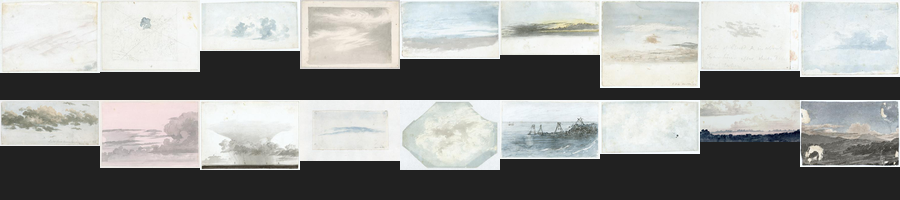

In [41]:
from ivpy import attach,show

attach(sciencemuseum_clouds_df, "Thumbnail")
show()

All suitably cloudlike. Some of the sketches contain landscape scenery which will be problematic and should be excluded if this was a real attempt to construct a cloud classification training set (and the many other steps needed to construct a real training set, such os the removal of signatures/text, removing the backdrop, etc, etc)

So now we have what we need for our small classification training set, lets start looking at some [Constable clouds](https://collections.vam.ac.uk/search/?q=clouds%20constable&images_exist=true&page=1) at the V&A using our API.

## Constable Clouds

In [48]:
import requests
import pandas as pd

vam_clouds_df = pd.read_csv("https://api.vam.ac.uk/v2/objects/search?q_object_title=Cloud&id_person=A8267&images_exist=1&response_format=csv")
vam_clouds_df

,accessionNumber,systemNumber,objectType,_primaryTitle,_primaryPlace,_primaryMaker__name,_primaryMaker__association,_primaryDate,_primaryImageId,_sampleMaterial,_sampleTechnique,_sampleStyle,_currentLocation__displayName,_objectContentWarning,_imageContentWarning
0,590-1888,O82726,Oil painting,Study of Clouds,Great Britain,"Constable, John (RA)",artist,05/09/1822,2014HA9998,oil paint,oil painting,British School,"Prints & Drawings Study Room, room WS",False,False
1,784-1888,O82649,Oil painting,Study of Cirrus Clouds,Great Britain,"Constable, John (RA)",artist,ca. 1822,2014GX8500,NaN,oil painting,British School,"Prints & Drawings Study Room, room WS",False,False
2,162-1888,O25338,Oil painting,Study of clouds and trees,London,"Constable, John",painters (artists),1821-1822,2006AP1993,oil paint,oil painting,British School,"Prints & Drawings Study Room, room WS",False,False
3,P.8-1973,O1041774,Watercolour,Landscape with trees and clouds,England,Constable,artist,ca. 1820,2013GE8594,pencil,watercolour drawing,NaN,"Prints & Drawings Study Room, level H",False,False
4,240-1888,O125166,Watercolour,Study of clouds above a wide landscape,great britain,"Constable, John (RA)",artist,15/09/1830,2006BF8141,pencil,NaN,British School,"Prints & Drawings Study Room, level H",False,False


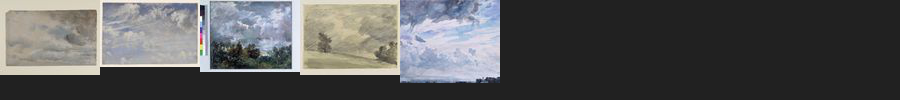

In [49]:
IIIF_IMAGE_URL = "https://framemark.vam.ac.uk/collections/%s/full/!100,100/0/default.jpg"
vam_clouds_df._primaryImageId = [IIIF_IMAGE_URL % item for item in vam_clouds_df._primaryImageId]
attach(vam_clouds_df, "_primaryImageId")
show()

So, a few cloud studies, one helpfully titled 'Study of Cirrus Clouds' which seems a good one to start with.

### Perceptual Hashing

One way to measure the distance between two images is the use of [Perceptual Hashing](https://tech.okcupid.com/evaluating-perceptual-image-hashes-okcupid/). Let's use the [ImageHash](https://github.com/JohannesBuchner/imagehash) library for Python to see how close the images are by the Perceptual Hashing algorithm.

In [82]:
import imagehash
from PIL import Image
import requests

vam_cloud_hashes = []
for index, obj in vam_clouds_df.iterrows():
  hash = imagehash.phash(Image.open(requests.get(obj['_primaryImageId'], stream=True).raw))
  vam_cloud_hashes.append(hash)
    
vam_clouds_df['Hash'] = vam_cloud_hashes

In [83]:
sciencemuseum_cloud_hashes = []
for index, obj in sciencemuseum_clouds_df.iterrows():
  hash = imagehash.phash(Image.open(requests.get(obj['Thumbnail'], stream=True).raw))
  sciencemuseum_cloud_hashes.append(hash)
    
sciencemuseum_clouds_df['Hash'] = sciencemuseum_cloud_hashes

Now we have the two hashes, we can subtract one from the other to see the distance between the images (the smaller the distance, the more similiar the images). Let's look at the distance from each of the Science Museum images to Constable's 'Study of Cirrus Clouds' sketch.

In [88]:
sciencemuseum_clouds_df['Hash'] - vam_clouds_df['Hash'].iloc[0]

0     36
1     34
2     28
3     24
4     28
5     32
6     28
7     32
8     32
9     32
10    28
11    32
12    28
13    32
14    28
15    34
16    36
17    32
Name: Hash, dtype: object

This has found that the most similiar (with the lowest distance of 24 using [perceptual hashing](https://en.wikipedia.org/wiki/Perceptual_hashing)) between Constable's ['Study of Cirrus Clouds'](https://collections.vam.ac.uk/item/O82649/study-of-cirrus-clouds-oil-painting-constable-john-ra/) is Luke Howards [Cloud Study of Cirrus](https://collection.sciencemuseumgroup.org.uk/objects/co67177/cloud-study-of-cirrus-drawing). 

So far then (somewhat astonishingly given the total lack of real validity in this example) this seems to be working. Let's try now with a second Constable sketch, this time without a helpful title indicating the type of clouds.

In [89]:
sciencemuseum_clouds_df['Hash'] - vam_clouds_df['Hash'].iloc[0]

0     34
1     30
2     30
3     28
4     28
5     30
6     30
7     38
8     28
9     24
10    24
11    32
12    22
13    36
14    32
15    38
16    36
17    28
Name: Hash, dtype: object

So, by this very very unscientific measure, the 13th sketch by Howard is the closest match to Constable's [Study of Clouds](https://collections.vam.ac.uk/item/O82726/study-of-clouds-oil-painting-constable-john-ra/), which is [Cloud Study of Dark Cirrostratus](https://collection.sciencemuseumgroup.org.uk/objects/co67196/cloud-study-of-dark-cirrostratus-drawing). 

## Cloud Machine Learning 

An obvious further step in a real examination would be to apply some more recent image recognition techniques involving machine learning and neural network, and using a larger training set of cloud classifications. This exercise is left to the reader (but let us [know](https://github.com/vanda/etc-docs/issues) if you find anything of interest).